# Week 6 Session :: PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### eigen decomposition 을 이용한 PCA 

In [2]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [3]:
# PCA를 수행하기 위해 먼저 공분산행렬을 구합니다.
X_cen = X - X.mean(axis=0)  # scaling
X_cov = np.dot(X_cen.T, X_cen) / 59 # covariance matrix

print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [4]:
# 다음으로 공분산행렬 X_cov에 대하여 eigenvalue와 eigenvector를 구합니다.
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [5]:
# 마지막으로 데이터에 대한 eigenvector들의 설명력을 확인합니다.
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


### Singular Value Decomposition을 이용한 PCA

In [6]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [7]:
# PCA를 수행하기 위해 먼저 데이터셋 X를 스케일링 합니다.
X_cen = X - X.mean(axis=0)  # scaling

print(X[0:5])
print(X_cen[0:5])

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]]
[[-1.03976771e+00 -7.60238460e-01 -3.32880482e-01]
 [-3.17841939e-02  3.90260570e-01 -3.64766659e-02]
 [-9.77238797e-01 -6.73862060e-01 -3.20757101e-01]
 [-9.44190485e-01  7.70779228e-04 -4.97304144e-02]
 [-7.87164831e-01 -5.10641487e-02  1.19970744e-01]]


In [8]:
# 다음으로 X_cen에 대하여 singular value와 singular vector를 구합니다.
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [9]:
# 마지막으로 설명력을 확인합니다.
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


# Week 6 LAB :: PCA & FA

In [10]:
# load iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.shape

(150, 5)

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Principal Component Analysis

In [13]:
# 먼저 scaling을 실시합니다.
# Transform scales onto unit scale (mean=0 and variance=1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [14]:
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [15]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [16]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


가장 큰 고유값인 2.93808505을 갖는 eigen vector가 제1주성분이 됩니다.

In [17]:
# PCA를 진행합니다.
pca = PCA(n_components=2) # PCA 선언 : 2차원으로 차원 축소 => 제1주성분, 제2주성분 총 2개의 주성분 반환
X_pca = pca.fit_transform(X) # PCA 적합

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca = pd.concat([df_pca, df[['target']]], axis=1)

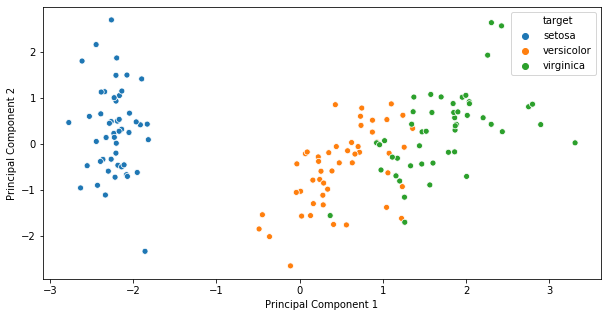

In [18]:
# PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca['Principal Component 1'], y = df_pca['Principal Component 2'], hue = df['target'])

In [19]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

PC1은 데이터를 약 72% 정도, PC2는 23% 정도 설명합니다.

### Factor Analysis : scikit-learn의 FactorAnalysis 이용

In [20]:
# Create factor analysis object and perform factor analysis
X = df.loc[:, features].values
fa = FactorAnalysis(n_components=10)
X_fa = fa.fit_transform(X)

In [21]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_fa.head()

,Factor1,Factor2,Factor3,Factor4
0,-1.226043,0.269089,0.0,0.0
1,-1.232343,-0.201804,0.0,0.0
2,-1.330547,-0.109966,0.0,0.0
3,-1.302661,-0.235704,0.0,0.0
4,-1.263690,0.312552,0.0,0.0


Factor1과 Factor2만 유의미합니다.

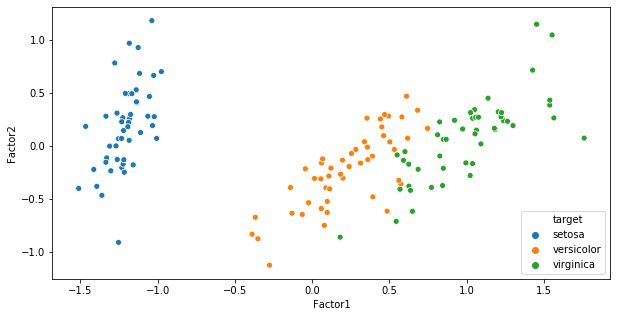

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_fa['Factor1'], y = df_fa['Factor2'], hue=df['target'])

### Factor Analysis : factor_analyzer의 FactorAnalyzer 이용

In [23]:
# Import the required modules
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [24]:
%cd C:\Users\ddora\OneDrive\바탕 화면

C:\Users\ddora\OneDrive\바탕 화면


In [25]:
# Import the dataset
fpath = './bfi.csv'
df = pd.read_csv(fpath, index_col=0)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [26]:
# Drop unnecessary columns
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [27]:
df = df.dropna()

In [28]:
# create a factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [29]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [30]:
# get the eigenvectors and eigenvalues
ev, v = fa.get_eigenvalues()

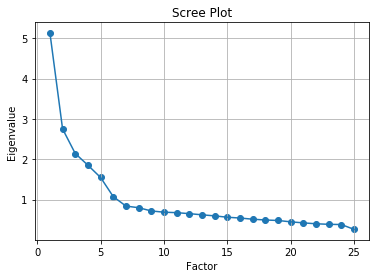

In [31]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Week6 HW

wine dataset을 활용하여 PCA 혹은 FA를 적용한 후, 적용하기 전과 적용한 후 분류모델의 성능을 비교해주세요.

### 준비

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.datasets
from factor_analyzer import FactorAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

In [33]:
#데이터 불러오기
wine = pd.read_csv('Wine.csv', header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [34]:
# 열 이름 설정
wine.columns=['class'
    ,'Alcohol'
    ,'Malic_acid'
    ,'Ash'
    ,'Alcalinity_of_ash'
    ,'Magnesium'
    ,'Total_phenols'
    ,'Flavanoids'
    ,'Nonflavanoid_phenols'
    ,'Proanthocyanins'
    ,'Color_intensity'
    ,'Hue'
    ,'OD280_OD315'
    ,'Proline']

In [35]:
wine.head(5) #10행까지의 자료만 확인

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
#NA값 있는지 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
wine.shape

(178, 14)

In [38]:
wine.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### PCA 및 FA 적용 전/후 분류모델 성능 비교 (Logistic Regression 모델 이용)

### PCA FA 적용 전

In [39]:
features=wine.columns
y=wine['class'].values
X=wine[features].values #design matrix

In [40]:
# Scikit learn의 train_test_split 함수 이용해서 train과 test set으로 나누기
# 비율은 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [41]:
# 분류모델: Logistic Regression
model = LogisticRegression(solver='sag', max_iter=100000)
#‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

In [42]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
pred=model.predict(X_test)
print(accuracy_score(y_test,pred))

0.9444444444444444


PCA 또는 FA하기 전 분류 정확도: 0.944444

### PCA, FA 분류 후

#### PCA

In [44]:
# 먼저 scaling을 실시합니다.
# Transform scales onto unit scale (mean=0 and variance=1)
X = wine.loc[:, features].values
y = wine.loc[:, ['class']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [45]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00564972 -0.3300763   0.44024952 -0.04992369  0.52078487 -0.21036119
  -0.72322641 -0.85228566  0.49187249 -0.50194977  0.26716852 -0.62085717
  -0.79268286 -0.63729711]
 [-0.3300763   1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816
   0.29073446  0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255
   0.07275191  0.64735687]
 [ 0.44024952  0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343
  -0.3370606  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685
  -0.37079354 -0.19309537]
 [-0.04992369  0.21273976  0.16497228  1.00564972  0.44587209  0.28820583
   0.12970824  0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874
   0.00393333  0.22488969]
 [ 0.52078487 -0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039
  -0.32292752 -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299
  -0.27833221 -0.44308618]
 [-0.21036119  0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972
   0.21561254  0.19688989 -0.25774204  0.23777643  0

In [46]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.05813894 0.13029618 0.35201176 0.16975037 0.29620602
 0.26378805 0.2271244 ]
eigenvector : [[-0.39366953 -0.00569041 -0.00121795 -0.12246373 -0.15758395  0.20033864
   0.05938234 -0.66904528  0.49224318  0.07179553  0.01575769 -0.16236882
  -0.19899373  0.01444169]
 [ 0.13632501 -0.48416087  0.20740081  0.08191848  0.25089415 -0.13517139
   0.09269887 -0.09062605  0.05610645  0.42154435 -0.26411262 -0.45019071
   0.31127983 -0.22154641]
 [-0.22267638 -0.22359095 -0.08879606 -0.46988824  0.18860015 -0.59841948
  -0.3743698   0.02522531 -0.06675544  0.08757556  0.1192121  -0.00602569
  -0.32592413  0.06839251]
 [ 0.00225793 -0.31585588 -0.62610236  0.24984122  0.0935236  -0.10799983
   0.16708856  0.00163582  0.19201787 -0.17208034 -0.04502305  0.26249446
  -0.12452347 -0.49452428]
 [-0.22429849  0.01161574 -0.6119896  -0.07199322 -0.0465675   0.08811224
   0.26872469  0.09536107 -0.20007784  0.

In [47]:
# PCA를 진행합니다.
pca = PCA(n_components=2) # PCA 선언 : 2차원으로 차원 축소 => 제1주성분, 제2주성분 총 2개의 주성분 반환
X_pca = pca.fit_transform(X) # PCA 적합

wine_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
wine_pca = pd.concat([wine_pca, wine[['class']]], axis=1)
wine_pca.head()

,Principal Component 1,Principal Component 2,class
0,-3.522934,-1.453098,1
1,-2.528858,0.330019,1
2,-2.785029,-1.036936,1
3,-3.922588,-2.768210,1
4,-1.407511,-0.867773,1


In [48]:
y_pca=wine_pca['class'].values

# train-test 분류 (8:2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=100)

In [49]:
model2 = LogisticRegression(solver='sag', max_iter=100000)
model2.fit(X_train_pca,y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259])

PC1은 데이터를 약 40% 정도, PC2는 18% 정도 설명함.

In [51]:
pred_pca=model2.predict(X_test_pca)
print(accuracy_score(y_test_pca,pred_pca))

0.9722222222222222


PCA 적용후 분류모델 성능: 97.2% 정도로 하기 전보다 높아짐.

#### FA

In [66]:
# Create factor analysis object and perform factor analysis
X = wine.loc[:, features].values
fa = FactorAnalysis(n_components=13)
X_fa = fa.fit_transform(X)

In [67]:
fa.fit(df)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=13,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

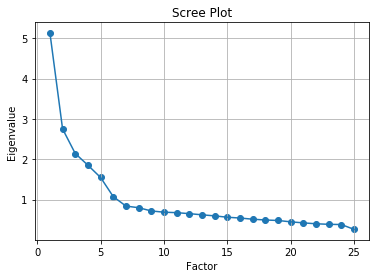

In [68]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

적당한 factor 개수는 7개...?

In [69]:
corr= wine[wine.columns].corr()

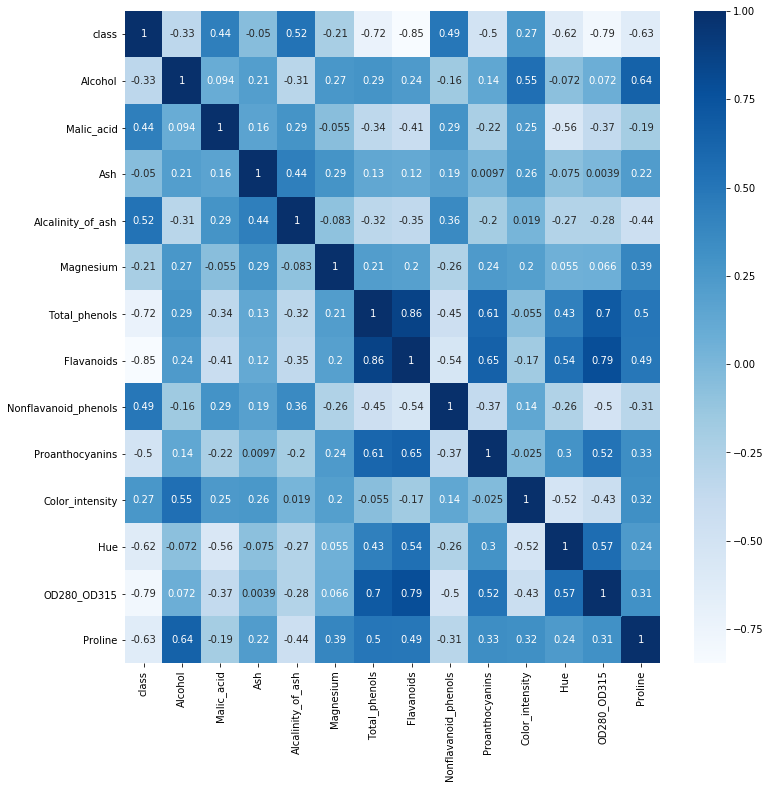

In [70]:
plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap="Blues", annot=True)

In [72]:
# Create factor analysis object and perform factor analysis
X = wine.loc[:, features].values
fa = FactorAnalysis(n_components=7)
X_fa = fa.fit_transform(X)

In [74]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7'])
df_fa = pd.concat([wine[['class']],df_fa], axis=1)
df_fa.head()

,class,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
0,1,1.014543,1.618855,-0.811003,0.183782,0.556824,-0.519494,0.116241
1,1,0.965123,-0.428755,-0.689389,-0.728214,0.782494,-0.629040,0.103768
2,1,1.394926,-0.493434,-0.382331,0.720288,-0.677712,0.212613,0.312393
3,1,2.334586,0.022344,0.124040,0.740407,0.463464,0.957319,0.546154
4,1,-0.036301,1.396983,-1.191155,1.067173,-1.213526,-1.643849,-0.090443


In [75]:
y_fa=df_fa['class'].values
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(X_fa, y_fa, test_size=0.2, random_state=7)

In [76]:
model3 = LogisticRegression(solver='sag', max_iter=100000)
model3.fit(X_train_fa,y_train_fa)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pred_fa=model3.predict(X_test_fa)
print(accuracy_score(y_test_fa,pred_fa))

1.0


FA 후 분류 모델 성능: 100%